In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
seaborn.set()

from analysis.cluster import filtered_songs, get_clusters, get_pca
from data.main import songs
from data.main import artists

In [2]:
songs.describe()

,year,tempo,song_hotttnesss,mode,mode_confidence,key,key_confidence,loudness,energy,duration,danceability,end_of_fade_in,start_of_fade_out,analysis_sample_rate
count,10000.000000,10000.000000,5648.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.0
mean,934.704600,122.915449,0.342822,0.691100,0.477784,5.276100,0.449573,-10.485668,0.0,238.507518,0.0,0.758616,229.975465,22050.0
std,996.650657,35.184412,0.247220,0.462063,0.191254,3.554087,0.274974,5.399788,0.0,114.137514,0.0,1.867952,112.195735,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-51.643000,0.0,1.044440,0.0,0.000000,1.044000,22050.0
25%,0.000000,96.965750,0.000000,0.000000,0.360000,2.000000,0.225000,-13.163250,0.0,176.032200,0.0,0.000000,168.856000,22050.0
50%,0.000000,120.161000,0.360371,1.000000,0.487000,5.000000,0.469000,-9.380000,0.0,223.059140,0.0,0.199000,213.879000,22050.0
75%,2000.000000,144.013250,0.537504,1.000000,0.606000,8.000000,0.659000,-6.532500,0.0,276.375060,0.0,0.421000,266.292000,22050.0
max,2010.000000,262.828000,1.000000,1.000000,1.000000,11.000000,1.000000,0.566000,0.0,1819.767710,0.0,43.119000,1813.426000,22050.0


In [3]:
hot_songs = songs[['artist_id','title', 'year', 'song_hotttnesss' ]]
hot_songs = hot_songs.sort_values('song_hotttnesss', ascending=False).head(10)

In [4]:
hot_songs = hot_songs.merge(artists, on=['artist_id'], how='inner')

# hot_songs = hot_songs[['title', 'artist_name', 'year', 'song_hotttnesss']]
hot_songs

,artist_id,title,year,song_hotttnesss,artist_name,similar_artists,num_artists,artist_tags,num_tags,artist_terms,num_terms,artist_hotness,artist_familiarity
0,ARDIBRT1187B9AF176,Immigrant Song (Album Version),1970,1.000000,Led Zeppelin,AR01VU31187B997DA0|AR12F2S1187FB56EEF|AR1ABAO1...,27.0,american|américain|blues rock|british|classic ...,15.0,60s|70s|alternative|alternative rock|ballad|bl...,37.0,0.634412,0.787098
1,ARKQQZA12086C116FC,Nothin' On You [feat. Bruno Mars] (Album Version),2010,1.000000,B.o.B,AR1VCLT1187FB4C8AC|AR38I491187B9B2F2D|AR3MSAN1...,13.0,united states,1.0,alternative rap|beats|dirty south rap|funk|fun...,15.0,0.712535,0.768224
2,ARTB5PP1187FB523B7,This Christmas (LP Version),0,0.997758,Donny Hathaway,AR2F4501187FB3EC2E|AR8XG9J1187FB418C1|ARAOPEF1...,13.0,rock and indie,1.0,afrobeat|art rock|blues|blues-rock|bossa nova|...,48.0,0.422472,0.657407
3,ARPAAHK1187B9ABB00,If Today Was Your Last Day (Album Version),2008,0.984347,Nickelback,AR0IVSA1187FB4F069|AR190KO1187B9905EC|AR1GNFR1...,21.0,alternative rock|canadian|hard rock|pop and ch...,7.0,acoustic|alternative metal|alternative rock|ca...,17.0,0.779968,0.847452
4,ARF5M7Q1187FB501E8,Harder To Breathe,2002,0.979837,Maroon 5,AR0S7TA1187FB4D024|AR1GNFR1187B9AD1FD|AR4EQ231...,27.0,adam levine|rock and indie|slow pop|united states,4.0,acoustic|alternative|bass|classic|classic rock...,17.0,0.843380,0.905477
5,AR8V1WA1187B9AD9E9,Blue Orchid,2005,0.972387,The White Stripes,AR3OS8N1187B9A5F87|AR633SY1187B9AC3B9|AR9NA5G1...,16.0,2000s|alternative rock|american|garage rock|in...,7.0,alternative|alternative rock|blues|blues-rock|...,12.0,0.653897,0.878811
6,ARVN9FZ1187FB393F1,Just Say Yes,2009,0.945995,Snow Patrol,AR4EQ231187B99368F|AR6XZ861187FB4CECD|AR8BUVM1...,14.0,british|northern irish|pop and chart|scottish|uk,5.0,acoustic|alternative|alternative rock|beautifu...,17.0,0.667295,0.818319
7,AR9OMFE1187FB3BB54,They Reminisce Over You (Single Version),1992,0.932274,Pete Rock & C.L. Smooth,AR0WGXC1187B9AAC99|AR1Q25M1187B9B0D73|AR2SGQW1...,17.0,NaN,NaN,90s|acid jazz|alternative hip hop|alternative ...,43.0,0.414400,0.489567
8,ARR3ONV1187B9A2F59,Exogenesis: Symphony Part 1 [Overture],0,0.931346,Muse,AR190KO1187B9905EC|AR633SY1187B9AC3B9|AR6892W1...,25.0,NaN,NaN,00s|alternative|alternative metal|alternative ...,32.0,0.750427,0.929030
9,ARHUC691187B9AD27F,Inertiatic Esp,2003,0.928617,The Mars Volta,AR12EOE1187FB3AE26|AR336PG1187FB3DC6E|AR6G4V01...,14.0,progressive rock,1.0,alternative|alternative rock|ambient|american|...,39.0,0.547764,0.867259


In [5]:
# Important columns
songs = songs[songs['year'] > 0]
songs = songs[songs['song_hotttnesss'] > 0]
year = songs['year']
hotness = songs['song_hotttnesss']

Text(0, 0.5, 'Hotness')

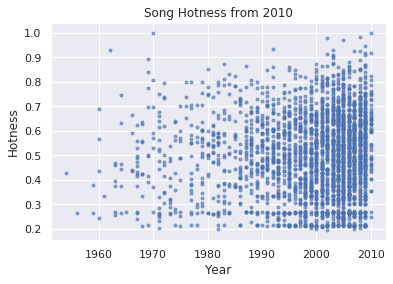

In [6]:
# Song Hotness
plt.plot(year, hotness, 'b.', alpha=0.6)
plt.title('Song Hotness from 2010')
plt.xlabel('Year')
plt.ylabel('Hotness')

Text(0, 0.5, 'Count')

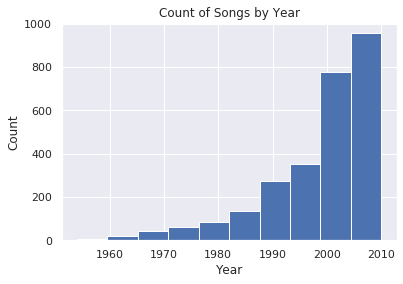

In [7]:
# Count of year
plt.hist(year)
plt.title('Count of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Count')

In [ ]:
# Count mode
# (minor, major)
plt.hist(songs['mode'])
plt.title('Count of Mode')
plt.xlabel('Mode')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

In [ ]:
# Count 
# (c, c-sharp, d, e-flat, e, f, f-sharp, g, a-flat, a, b-flat, b) 0 - 11
plt.hist(songs['key'])
plt.title('Count of Key')
plt.xlabel('Key')
plt.ylabel('Count')

In [ ]:
# Loudness 
# overall loudness in dB
plt.hist(songs['loudness'])
plt.title('Count of Loudness')
plt.xlabel('Loudness (db)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

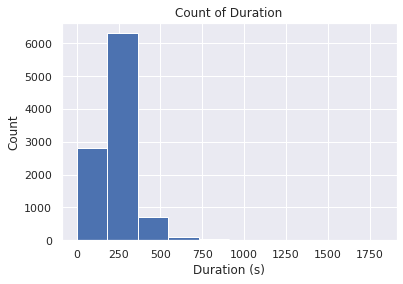

In [7]:
# Duration 
# Average duration 238.507518s => ~ 4 minutes
plt.hist(songs['duration'])
plt.title('Count of Duration')
plt.xlabel('Duration (s)')
plt.ylabel('Count')

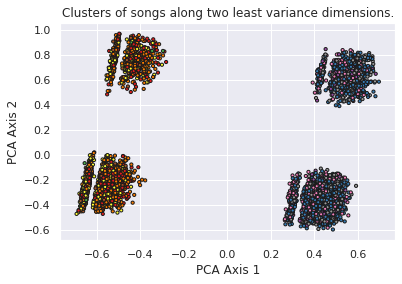

In [20]:
clusters = get_clusters(filtered_songs, 10)
songs_pca = get_pca(filtered_songs, 10)

plt.title('Clusters of songs along two least variance dimensions')
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.scatter(songs_pca[:, 0], songs_pca[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=10)
plt.show()

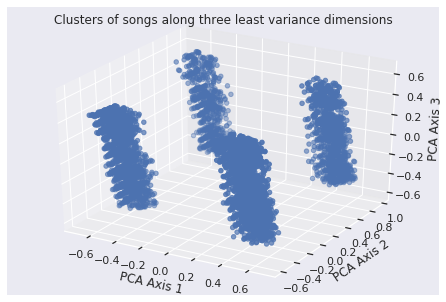

In [27]:
fig = plt.figure()
ax = Axes3D(fig)
plt.title('Clusters of songs along three least variance dimensions')
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
ax.set_zlabel('PCA Axis 3')
ax.scatter(songs_pca[:, 0], songs_pca[:, 1], songs_pca[:, 2])
plt.show()